In [1]:
from pylab import plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
import scipy.stats as scs
import pandas_datareader as web
import statsmodels.api as sm
from yahoo_fin import options
import math

In [2]:
AAPL = web.get_data_yahoo("^GSPC",
                            start = "1992-04-18",
                            end = "2002-04-18")
AAPL['returns'] = np.log(AAPL['Adj Close'])-np.log(AAPL['Adj Close'].shift(1))
AAPL['rea_var'] = 252 * np.cumsum(AAPL['returns'] ** 2) / np.arange(len(AAPL['returns']))
AAPL['rea_vol'] = np.sqrt(AAPL['rea_var'])
AAPL=AAPL.dropna()
AAPL

,High,Low,Open,Close,Volume,Adj Close,returns,rea_var,rea_vol
Date,,,,,,,,,
1992-04-21,411.089996,408.200012,410.160004,410.260010,214460000,410.260010,0.000195,0.000010,0.003096
1992-04-22,411.299988,409.230011,410.260010,409.809998,218850000,409.809998,-0.001097,0.000157,0.012512
1992-04-23,411.600006,406.859985,409.809998,411.600006,235860000,411.600006,0.004358,0.001700,0.041231
1992-04-24,412.480011,408.739990,411.600006,409.019989,199310000,409.019989,-0.006288,0.003766,0.061367
1992-04-27,409.600006,407.640015,409.029999,408.450012,172900000,408.450012,-0.001394,0.003111,0.055774
...,...,...,...,...,...,...,...,...,...
2002-04-12,1112.770020,1102.739990,1103.689941,1111.010010,1282100000,1111.010010,0.006610,0.025368,0.159272
2002-04-15,1114.859985,1099.410034,1111.010010,1102.550049,1120400000,1102.550049,-0.007644,0.025363,0.159259
2002-04-16,1129.400024,1102.550049,1102.550049,1128.369995,1341300000,1128.369995,0.023148,0.025407,0.159395


In [3]:
def print_statistics(data):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily  Log Returns %9.6f" % np.mean(data['returns']))
    print("Mean of Annua. Log Returns %9.6f" %
          (np.mean(data['returns']) * 252))
    print("Std  of Annua. Log Returns %9.6f" %
          (np.std(data['returns']) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(data['returns']))
    print("Skew Normal Test p-value   %9.6f" % scs.skewtest(data['returns'])[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(data['returns']))
    print("Kurt Normal Test p-value   %9.6f" %
          scs.kurtosistest(data['returns'])[1])
    print("---------------------------------------------")
    print("Normal Test p-value        %9.6f" %
          scs.normaltest(data['returns'])[1])
    print("---------------------------------------------")
    print("Realized Volatility        %9.6f" % data['rea_vol'].iloc[-1])
    print("Realized Variance          %9.6f" % data['rea_var'].iloc[-1])

In [4]:
print_statistics(AAPL)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000400
Mean of Annua. Log Returns  0.100847
Std  of Annua. Log Returns  0.159207
---------------------------------------------
Skew of Sample Log Returns -0.295478
Skew Normal Test p-value    0.000000
---------------------------------------------
Kurt of Sample Log Returns  4.619911
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------
Realized Volatility         0.159334
Realized Variance           0.025387


In [5]:
def quotes_returns(data):
    ''' Plots quotes and returns. '''
    plt.figure(figsize=(9, 6))
    plt.subplot(211)
    plt.plot(data['Adj Close'],'k')
    plt.ylabel('Cena indeksu')
    plt.grid(True)
    plt.axis('tight') 

    plt.subplot(212)
    data['returns'].plot(color='k')
    plt.ylabel('logarytmiczne dzienne zwroty')
    plt.xlabel('czas')
    plt.grid(True)
    plt.axis('tight')

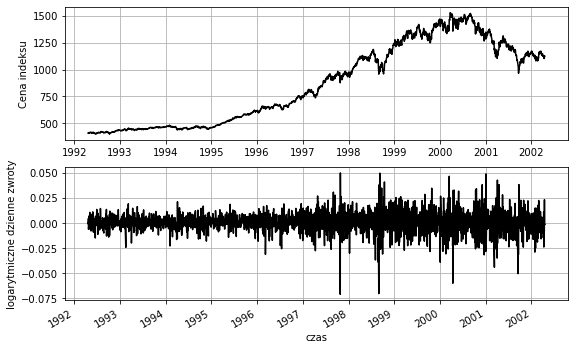

In [6]:
quotes_returns(AAPL)
plt.savefig('cena_indeksu.png', dpi=400)

In [9]:
def dN(x, mu, sigma):
    z = (x - mu) / sigma
    pdf = np.exp(-0.5 * z ** 2) / math.sqrt(2 * math.pi * sigma ** 2)
    return pdf

In [10]:
def return_histogram(data):
    ''' Plots a histogram of the returns. '''
    plt.figure(figsize=(9, 5))
    x = np.linspace(min(data['returns']), max(data['returns']), 200)
    plt.hist(np.array(data['returns']), bins=70, density=True, color='k')
    y = scs.norm.pdf(x, np.mean(data['returns']), 0.006959125829650074)
    z = dN(x, np.mean(data['returns']), np.std(data['returns']))
    plt.plot(x, y, linewidth=2, color='r')
    plt.plot(x, z, linewidth=2, color='chartreuse')
    plt.xlabel('logarytmiczne zwroty')
    plt.ylabel('częstotliwość')
    plt.grid(True)

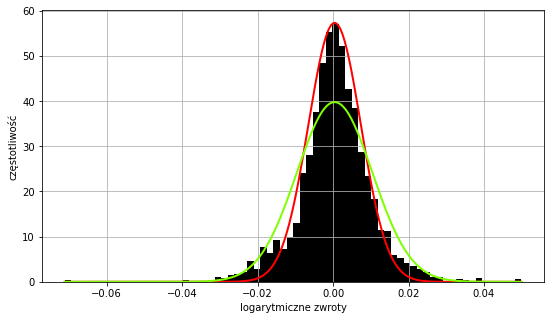

In [11]:
return_histogram(AAPL)
plt.savefig('histogram.png', dpi=400)

In [12]:
# plt.figure(figsize=(16, 6))


# fig = plt.figure(figsize=(16, 6))
# ax1 = fig.add_subplot(1, 2, 2)
# sm.qqplot(AAPL['returns'], line='s', color='k', ax=ax1)
# plt.grid(True)
# plt.xlabel('kwantyle teoretyczne')
# plt.ylabel('kwantyle z próby')
# plt.axis('tight')


# ax2=fig.add_subplot(1, 2, 1)
# x = np.linspace(min(AAPL['returns']), max(AAPL['returns']), 100)
# y = dN(x, np.mean(AAPL['returns']), 0.007029125829650074)
# plt.hist(np.array(AAPL['returns']), bins=70, density=True, color='k')
# plt.plot(x, y, linewidth=2, color='r')
# plt.xlabel('logarytmiczne zwroty')
# plt.ylabel('częstotliwość')
# plt.grid(True)
# plt.axis('tight') 
# plt.savefig('wykres2.png', dpi=200)

In [13]:
def return_qqplot(data):
    ''' Generates a Q-Q plot of the returns.'''
    plt.figure(figsize=(10, 6))
    sm.qqplot(data['returns'], line='s', color='k')
    plt.grid(True)
    plt.xlabel('kwantyle teoretyczne')
    plt.ylabel('kwantyle z próby')
    plt.savefig('kwantyl.png', dpi=400)

<Figure size 720x432 with 0 Axes>

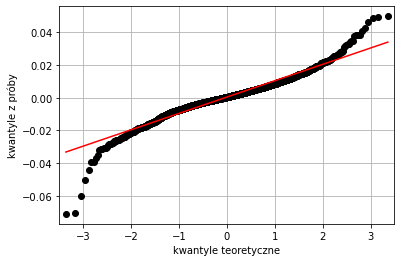

In [14]:
return_qqplot(AAPL)

In [15]:
def bsm_call_value(S0, K, T, r, q, sigma):
    from math import log, sqrt, exp
    from scipy import stats

    S0 = float(S0)
    d1 = (log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    value = (np.exp(-q*T)*S0 * stats.norm.cdf(d1, 0.0, 1.0)
            - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

# Vega function


def bsm_vega(S0, K, T, r, q, sigma):
    from math import log, sqrt, exp
    from scipy import stats

    S0 = float(S0)
    d1 = (log(S0 / K) + (r - q + (0.5 * sigma ** 2) * T)) / (sigma * sqrt(T))
    vega = S0 * exp(-q * T) * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(T)
    return vega

# Implied volatility function

def bsm_call_imp_vol(S0, K, T, r, q, C0, sigma_est, it=100):
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, q, sigma_est) - C0)
                        / bsm_vega(S0, K, T, r, q, sigma_est))
    return sigma_est


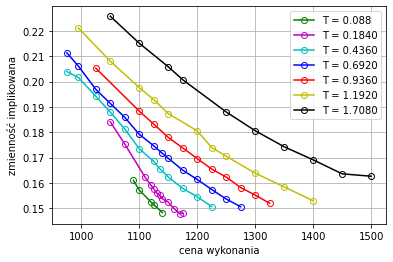

In [16]:
# Implied volatilty surface 

from pylab import *
import mpl_toolkits.mplot3d.axes3d as p3
#
# Option Data
#
S0 =1124.47 
T = array((0.088, 0.1840, 0.4360, 0.6920, 0.9360, 1.1920, 1.7080))  # call option maturities
r = 0.019
q = 0.012   


K1 = array((1090,1100,1120,1125,1140))
C1 = array((43.10, 35.60, 22.90, 20.20, 13.30))
imv1 = []
for j in range(len(K1)):
    imv1.append(bsm_call_imp_vol(S0, K1[j], T[0], r, q, C1[j], 0.2))    
imv1 = array(imv1)
imv1


K2 = array((1050,1075,1110,1120,1125,1130,1135,1140,1150,1160,1170,1175))
C2 = array((84.50, 64.30, 39.50, 33.50, 30.70, 28.00,  25.60, 23.20,19.10,15.30,12.10,10.90))
imv2 = []
for j in range(len(K2)):
    imv2.append(bsm_call_imp_vol(S0, K2[j], T[1], r, q, C2[j], 0.2))    
imv2 = array(imv2)


K3 = array((975,995,1025,1050,1075,1100,1125,1135,1150,1175,1200,1225))
C3 = array((161.60, 144.80, 120.10, 100.70, 82.50,65.50,51.00,45.50,38.10,27.70,19.60,13.20))
imv3 = []
for j in range(len(K3)):
    imv3.append(bsm_call_imp_vol(S0, K3[j], T[2], r, q, C3[j], 0.2))    
imv3 = array(imv3)


K4 = array((975,995,1025,1050,1075,1100,1125,1140,1150,1175,1200,1225,1250,1275))
C4 = array((173.30,157.00,133.10,114.80,97.60,81.20,66.90,58.90,53.90,42.50,33.00,24.90,18.30,13.20))
imv4 = []
for j in range(len(K4)):
    imv4.append(bsm_call_imp_vol(S0, K4[j], T[3], r, q, C4[j], 0.2))    
imv4 = array(imv4)


K5 = array((1025,1100,1125,1150,1175,1200,1225,1250,1275,1300,1325))
C5 = array((146.50,96.20,81.70,68.30,56.60,46.10,36.90,29.30,22.50,17.20,12.80))
imv5 = []
for j in range(len(K5)):
    imv5.append(bsm_call_imp_vol(S0, K5[j], T[4], r, q, C5[j], 0.2))   
imv5 = array(imv5)


K6 = array((995,1050,1100,1125,1150,1200,1225,1250,1300,1350,1400))
C6 = array((182.10,143.00,111.30,97.00,83.30,60.90,49.80,41.20,27.10,17.10,10.10))
imv6 = []
for j in range(len(K6)):
    imv6.append(bsm_call_imp_vol(S0, K6[j], T[5], r, q, C6[j], 0.2))
imv6 = array(imv6)


K7 = array((1050,1100,1150,1175,1250,1300,1350,1400,1450,1500))
C7 = array((171.40,140.40,112.80,99.80,66.90,49.50,35.70,25.20,17.00,12.20))
imv7 = []
for j in range(len(K7)):
    imv7.append(bsm_call_imp_vol(S0, K7[j], T[6], r, q, C7[j], 0.2))    
imv7 = array(imv7)


imv = array((imv1, imv2, imv3, imv4, imv5, imv6, imv7))

#
# Graphical Output
#
## 2d Output
figure()
plot(K1, imv[0] , 'go', ls='-',fillstyle='none', label='T = 0.088')
plot(K2, imv[1] , 'mo', ls='-',fillstyle='none', label='T = 0.1840')
plot(K3, imv[2] , 'co', ls='-',fillstyle='none', label='T = 0.4360')
plot(K4, imv[3] , 'bo', ls='-',fillstyle='none', label='T = 0.6920')
plot(K5, imv[4] , 'ro', ls='-',fillstyle='none', label='T = 0.9360')
plot(K6, imv[5] , 'yo', ls='-',fillstyle='none', label='T = 1.1920')
plot(K7, imv[6] , 'ko', ls='-',fillstyle='none', label='T = 1.7080')
grid(True)
legend()
xlabel('cena wykonania')
ylabel('zmienność implikowana')

plt.savefig('zmienność_implikowana.png', dpi=400)

# K=array((K1, K2, K3, K4, K5, K6, K7))
# ## 3d Output
# k, t = meshgrid(K, T)
# fig = figure()
# plot = p3.Axes3D(fig)
# plot.plot_wireframe(k, t, imv)
# plot.set_xlabel('K')
# plot.set_ylabel('T')
# plot.set_zlabel('Implied Volatility')